In [37]:
import glob
import pandas as pd

# get data file names
path =r'/Users/apple/Downloads/Company Files/test'
filenames = glob.glob(path + "/*.csv")

dic = {}
def retDataFrame(filename):   
    tDf1 = pd.read_csv(filename, encoding='latin-1')
    tDf2 = tDf1.groupby('COMPANY_STATUS').size()
    tDf3 = tDf2.to_frame(name=None).T
    tDf4 = tDf3.rename(index={0: b[0]})
    return tDf4;

for filename in filenames:
    a=filename.split('_')
    b=a[6].split('.')
    dic[b[0]] = retDataFrame(filename)

# Concatenate all data into one DataFrame
mn_tble = pd.concat(dic.values())
mn_tble

,ACTIVE,ACTIVE IN PROGRESS,AMALGAMATED,CONVERTED TO LLP,CONVERTED TO LLP AND DISSOLVED,DEFAULT,DISSOLVED,DORMANT,"Dormant under section 455 of Companies Act, 2013",LIQUIDATED,STRIKE OFF,UNDER LIQUIDATION,UNDER PROCESS OF STRIKING OFF
Andaman Nicobar,200,2.0,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,5.0,NaN,NaN
Andhra Pradesh,13397,7.0,72.0,4.0,8.0,NaN,NaN,5390.0,NaN,1.0,2061.0,53.0,212.0
Arunachal Pradesh,183,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,234.0,2.0,61.0
Assam,5106,NaN,65.0,5.0,5.0,NaN,4.0,174.0,NaN,1.0,2644.0,14.0,1245.0
Bihar,12653,6.0,4.0,2.0,2.0,NaN,14.0,1208.0,5.0,1.0,2410.0,41.0,3323.0
Chandigarh,7445,NaN,35.0,1.0,17.0,1.0,NaN,1103.0,NaN,NaN,3932.0,68.0,63.0
Chhattisgarh,6212,1.0,13.0,4.0,16.0,NaN,NaN,244.0,1.0,NaN,1017.0,1.0,15.0
Dadra Nagar Haveli,341,NaN,6.0,NaN,1.0,NaN,NaN,38.0,NaN,NaN,35.0,NaN,10.0
Daman Diu,191,NaN,6.0,NaN,1.0,NaN,NaN,14.0,1.0,1.0,49.0,2.0,33.0
Delhi,197051,27.0,3078.0,189.0,532.0,NaN,109.0,28168.0,65.0,54.0,40966.0,689.0,1441.0


In [2]:
mn_tble['RATIO_ACTIVE_DORMANT']=mn_tble['DORMANT']/mn_tble['ACTIVE']

In [3]:
mn = mn_tble.fillna(0)
df_tble = mn.astype(int)
df_tble.head()

,ACTIVE,ACTIVE IN PROGRESS,AMALGAMATED,CONVERTED TO LLP,CONVERTED TO LLP AND DISSOLVED,DEFAULT,DISSOLVED,DORMANT,"Dormant under section 455 of Companies Act, 2013",LIQUIDATED,STRIKE OFF,UNDER LIQUIDATION,UNDER PROCESS OF STRIKING OFF,RATIO_ACTIVE_DORMANT
Andaman Nicobar,200,2,0,0,0,0,0,46,0,0,5,0,0,0
Andhra Pradesh,13397,7,72,4,8,0,0,5390,0,1,2061,53,212,0
Arunachal Pradesh,183,0,0,0,0,0,0,9,0,0,234,2,61,0
Assam,5106,0,65,5,5,0,4,174,0,1,2644,14,1245,0
Bihar,12653,6,4,2,2,0,14,1208,5,1,2410,41,3323,0


In [4]:
import seaborn as sns
%matplotlib inline

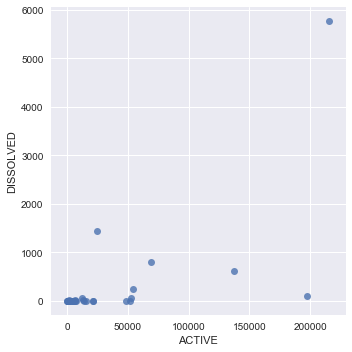

In [5]:
sns.lmplot('ACTIVE','DISSOLVED', data=mn, fit_reg=False)

In [6]:
df1=df_tble.drop('RATIO_ACTIVE_DORMANT',axis=1)
df1['ratio_active_dorm'] = df_tble['ACTIVE']/df_tble['DORMANT']

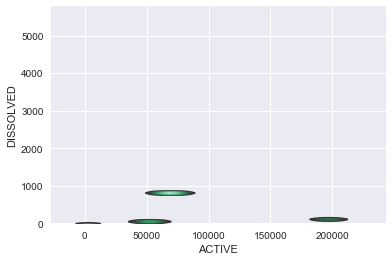

In [7]:
sns.kdeplot(df1.ACTIVE, df1.DISSOLVED)

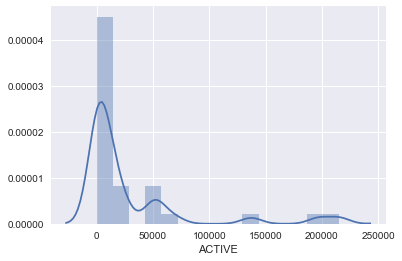

In [8]:
sns.distplot(df1.ACTIVE)

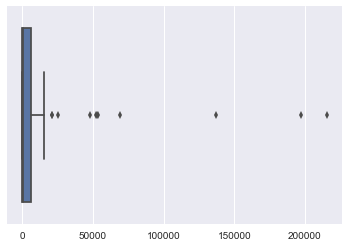

In [9]:
sns.boxplot([df1.ACTIVE, df1.DISSOLVED])

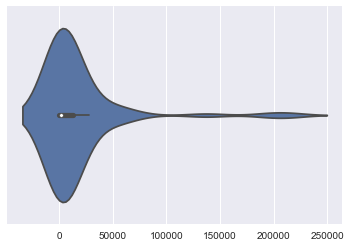

In [10]:
sns.violinplot([df1.ACTIVE, df1.DORMANT])

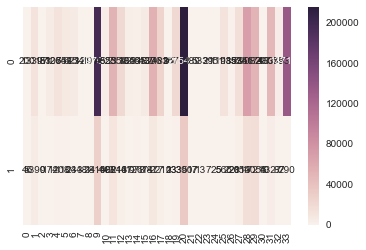

In [11]:
sns.heatmap([df1.ACTIVE, df1.DORMANT], annot=True, fmt="d")

In [12]:
df3 = df1.drop('ratio_active_dorm',axis=1)

df3.head(2)

,ACTIVE,ACTIVE IN PROGRESS,AMALGAMATED,CONVERTED TO LLP,CONVERTED TO LLP AND DISSOLVED,DEFAULT,DISSOLVED,DORMANT,"Dormant under section 455 of Companies Act, 2013",LIQUIDATED,STRIKE OFF,UNDER LIQUIDATION,UNDER PROCESS OF STRIKING OFF
Andaman Nicobar,200,2,0,0,0,0,0,46,0,0,5,0,0
Andhra Pradesh,13397,7,72,4,8,0,0,5390,0,1,2061,53,212


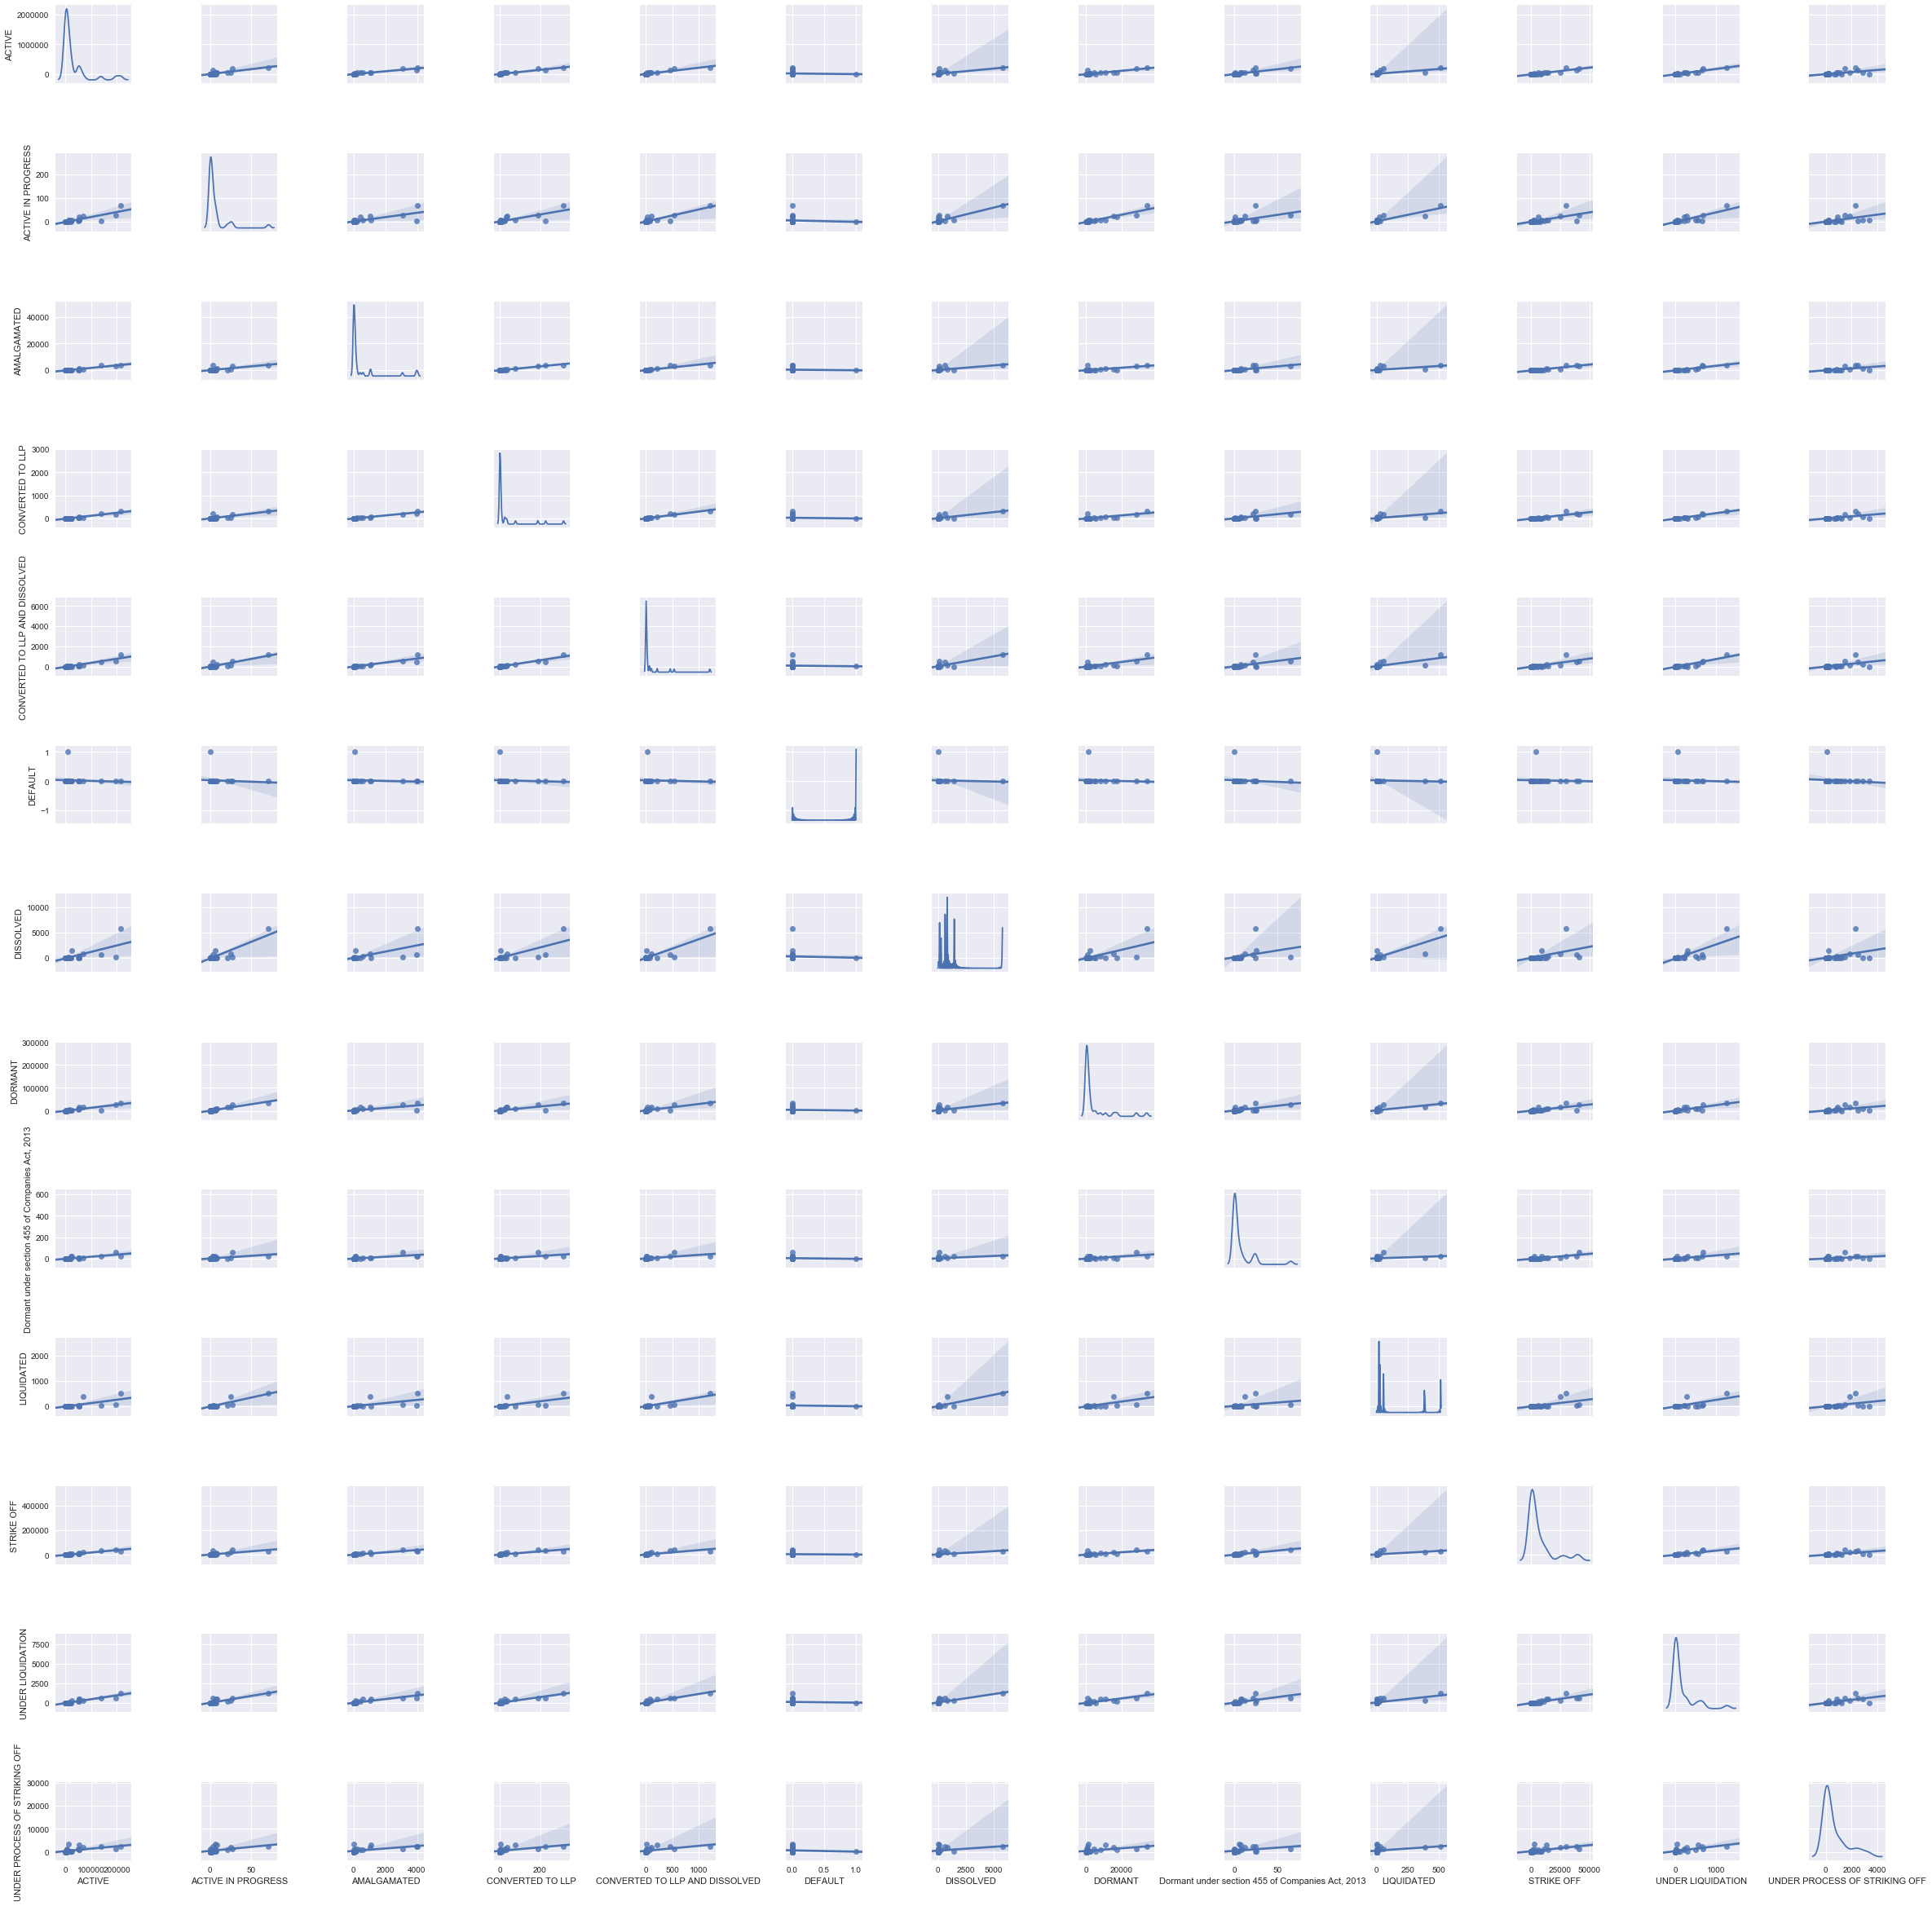

In [13]:
sns.pairplot(df3, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='reg', diag_kind='kde', markers=None, size=2.5, aspect=1, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None)

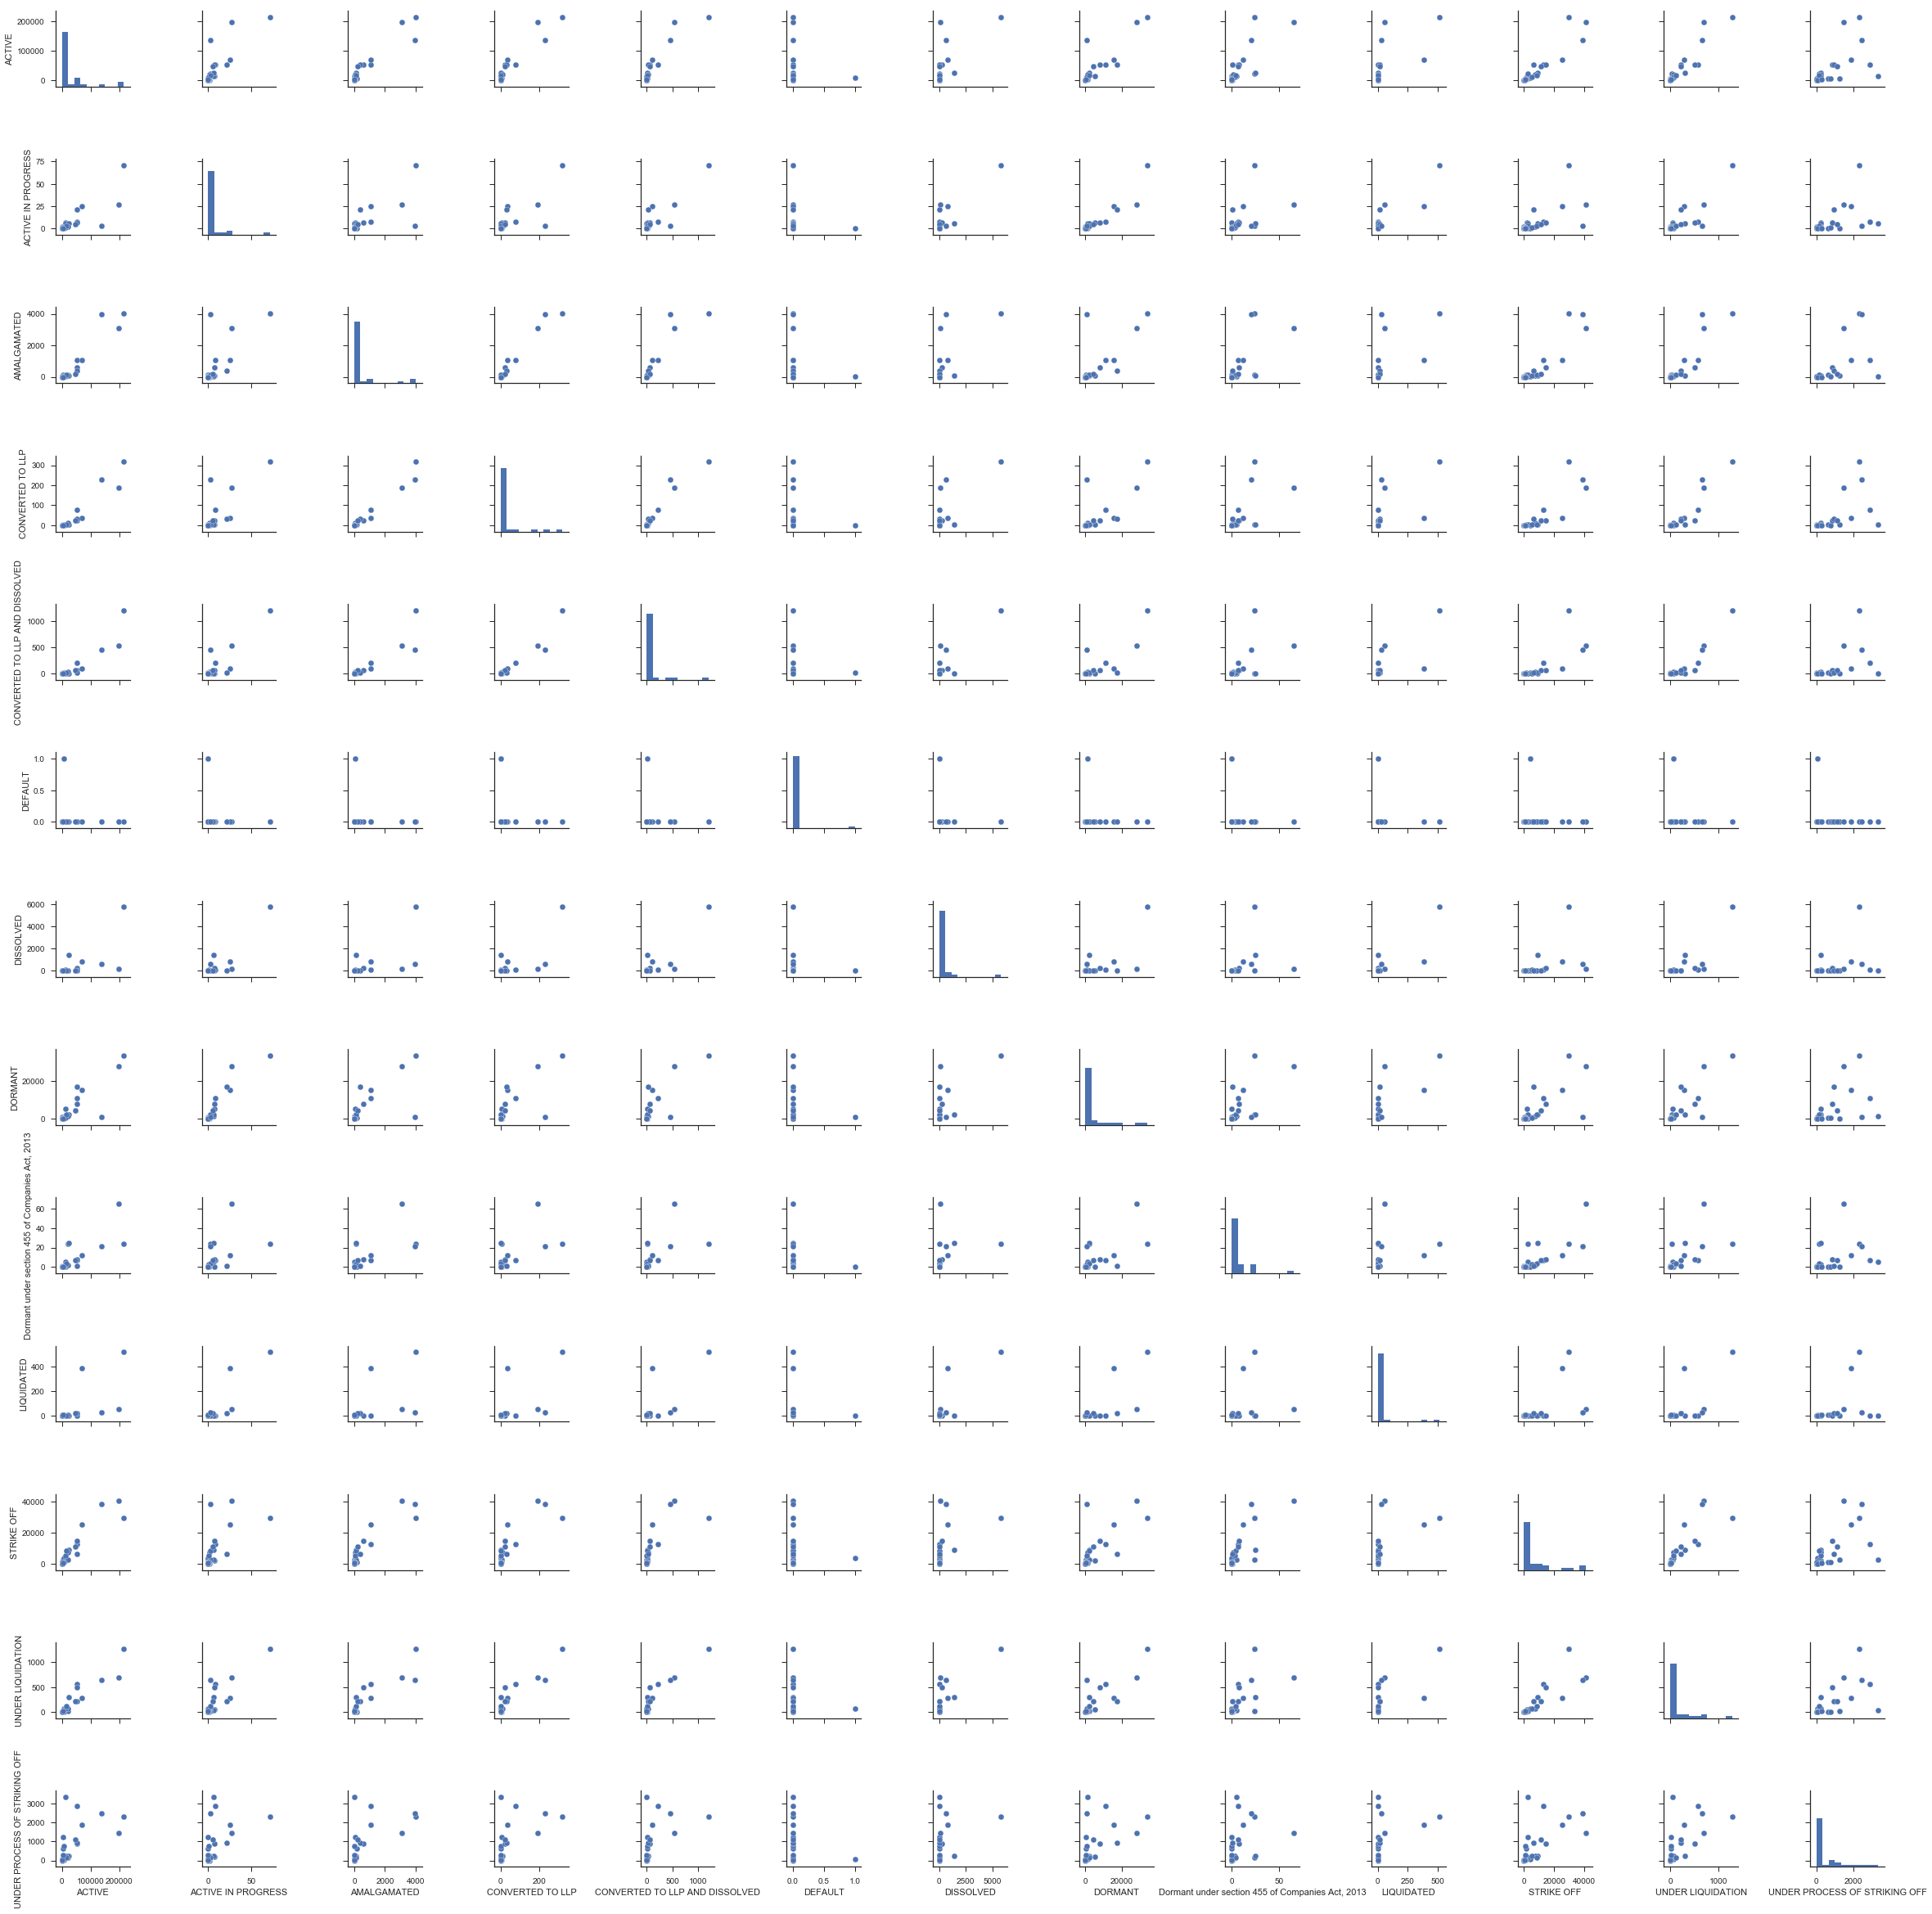

In [14]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df3)

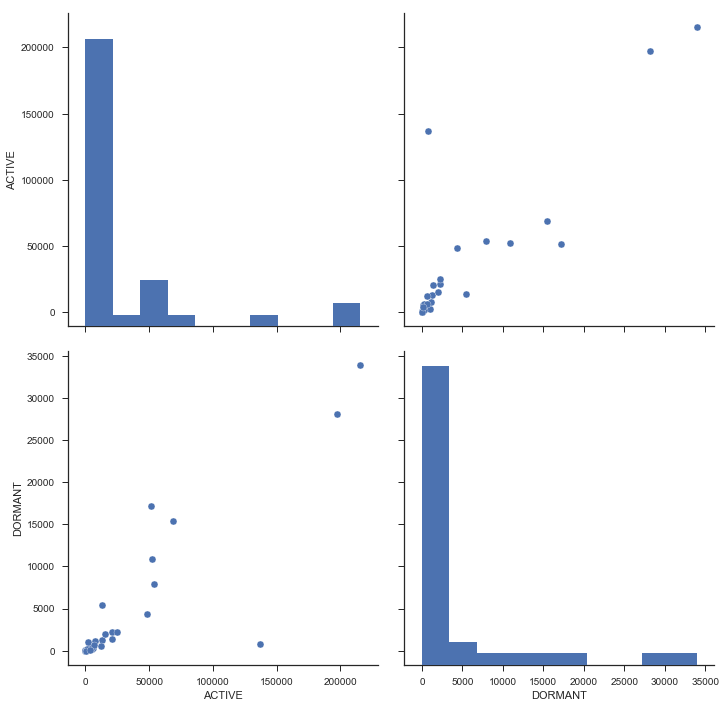

In [15]:
g = sns.pairplot(df3, size = 5,vars=["ACTIVE", "DORMANT"])

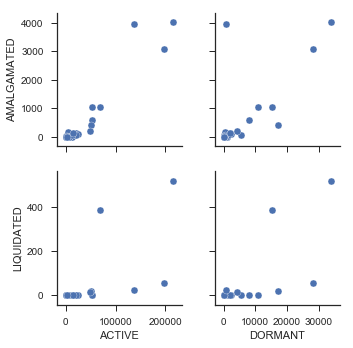

In [16]:
g = sns.pairplot(df3,
...                  x_vars=["ACTIVE", "DORMANT"],
...                  y_vars=["AMALGAMATED", "LIQUIDATED"])


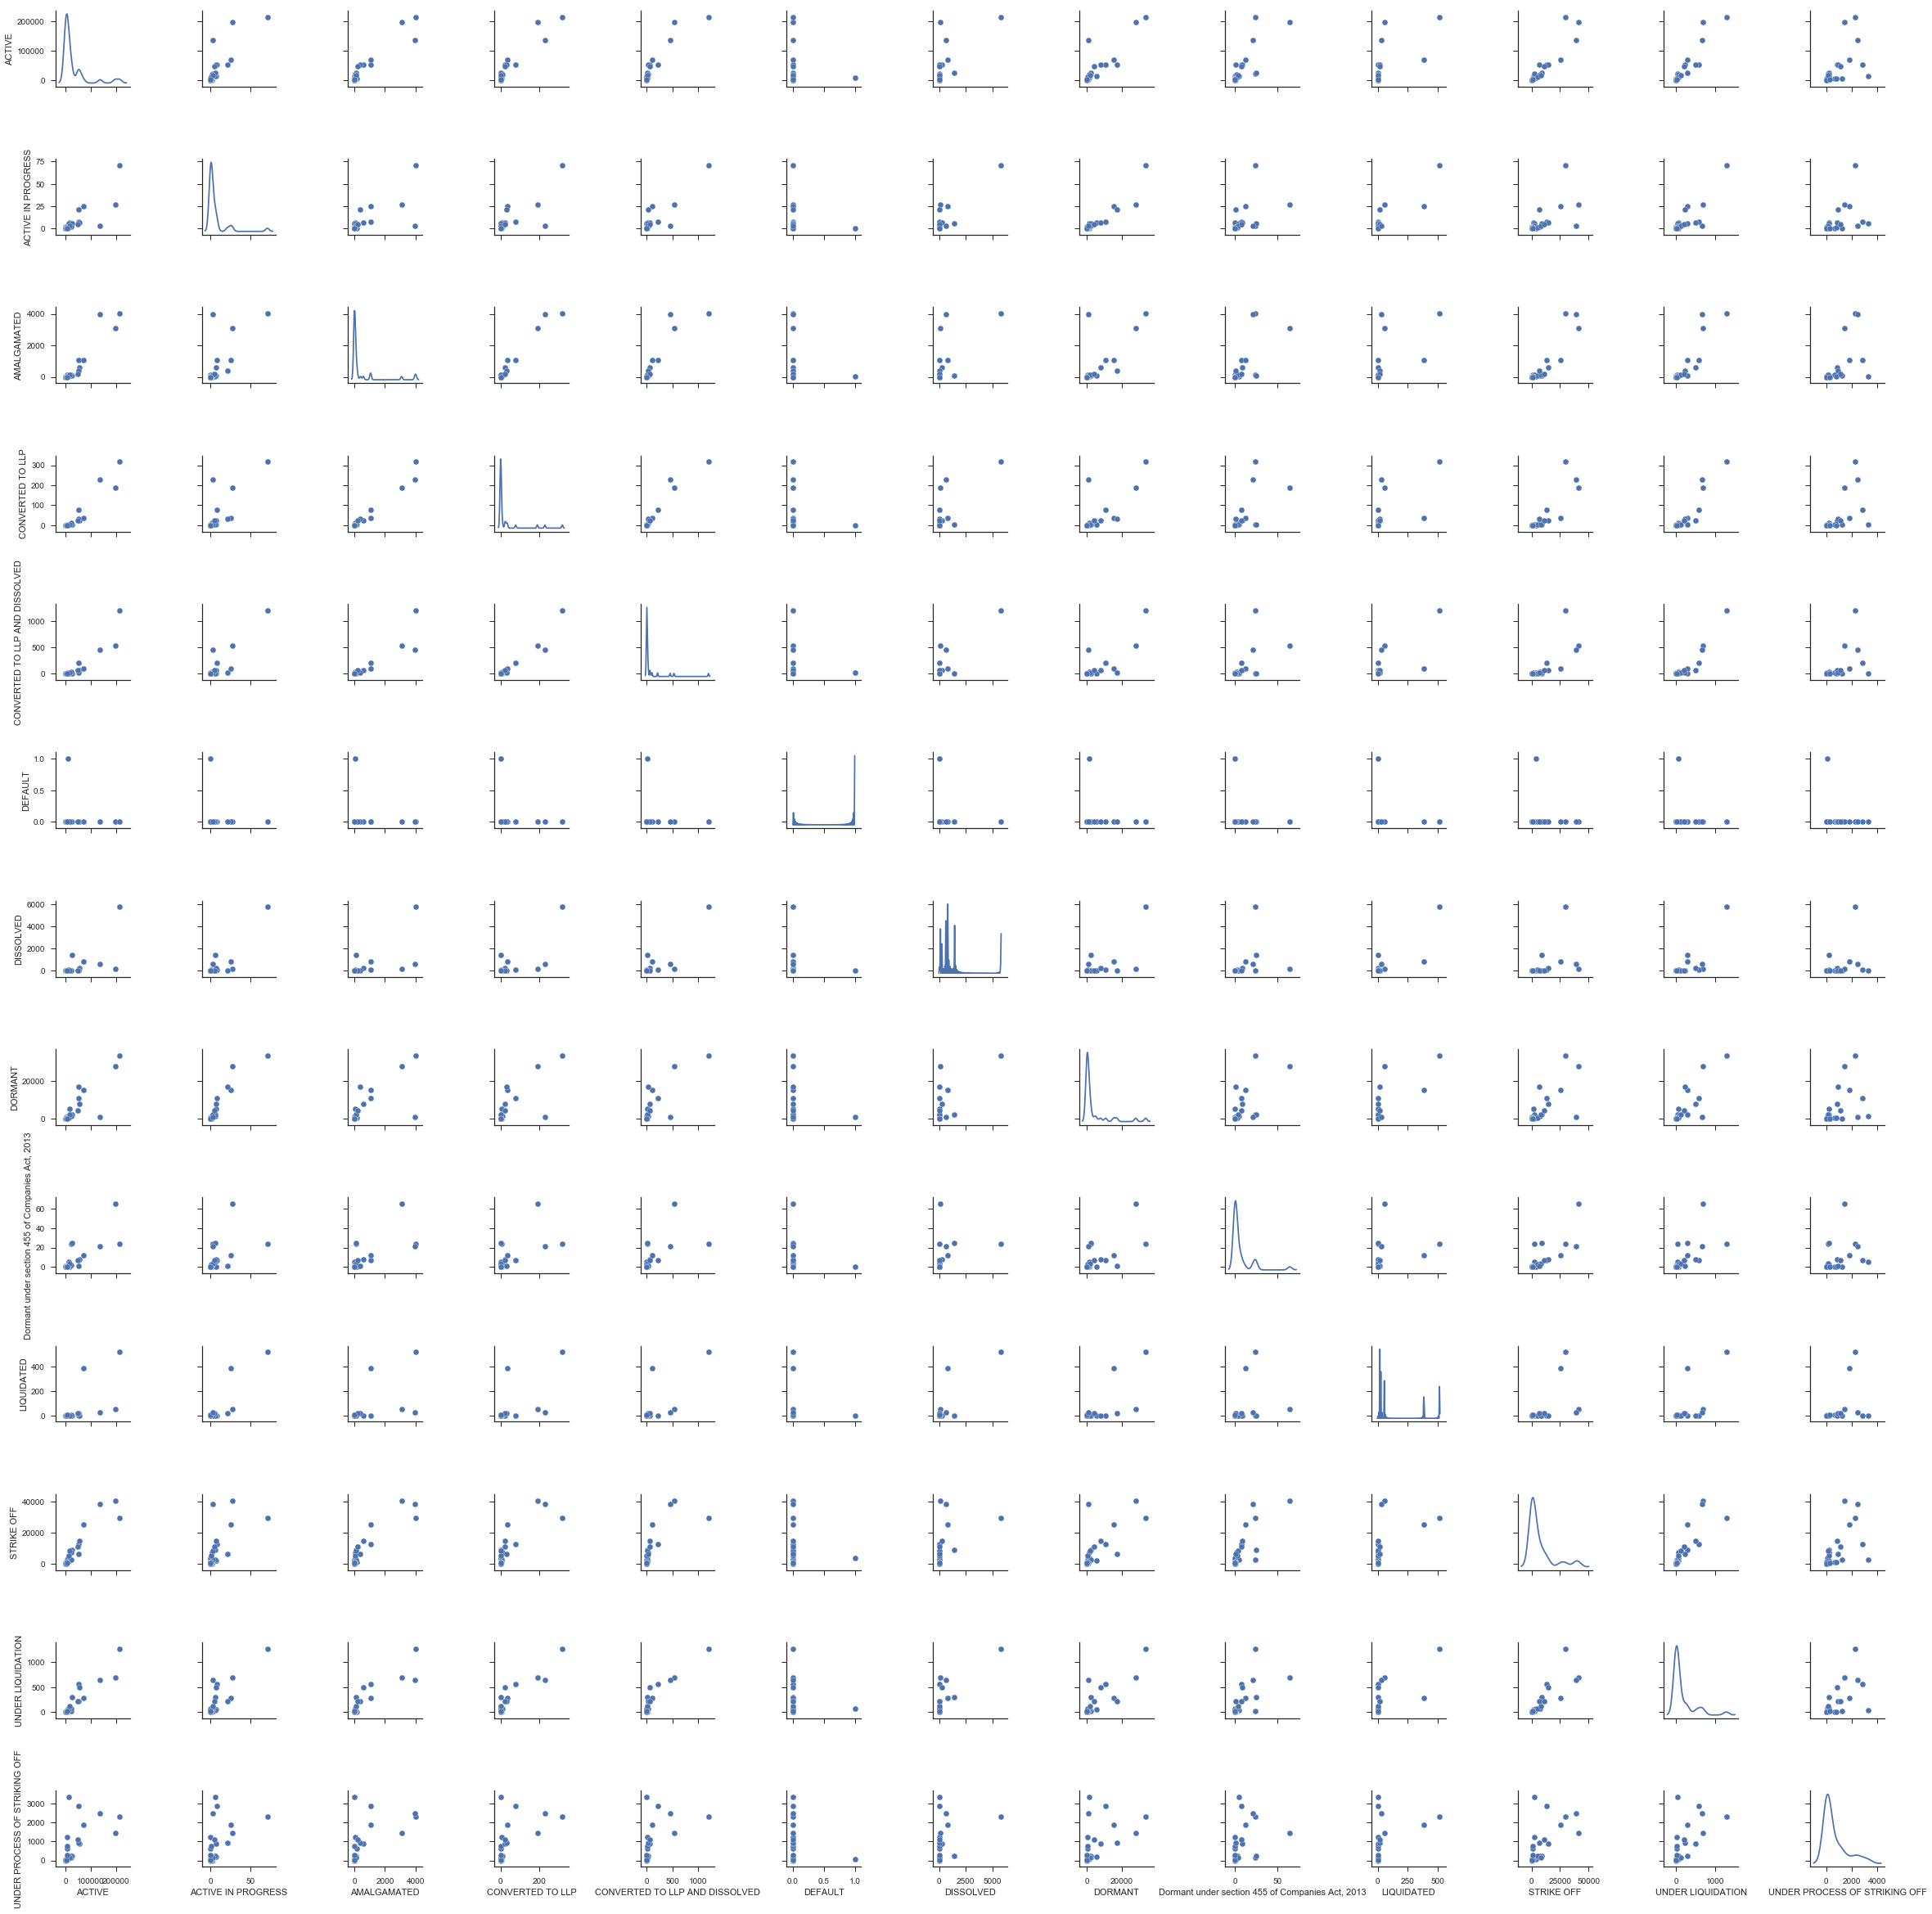

In [17]:
g = sns.pairplot(df3, diag_kind="kde")

In [18]:
df4=df3.sort_values('DORMANT',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

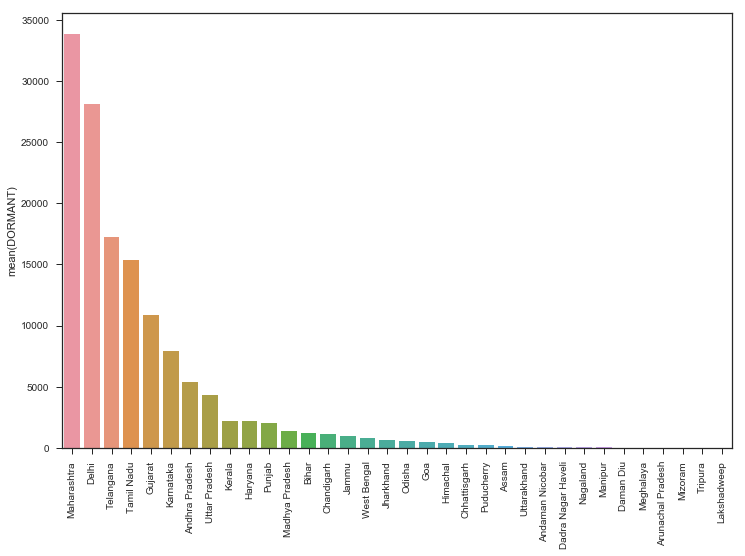

In [22]:
import matplotlib.pyplot as plt
# ax = sns.barplot(x='DORMANT', y="ACTIVE", data=df4,orient='h')
# sns.set(style="darkgrid")   # Only need to call this once 
fig, ax1 = plt.subplots(figsize=(12,8)) 
sns.barplot(x=df4.index, y='DORMANT', hue=None,data=df4)
plt.xticks(rotation=90)

In [23]:
df5=df4.iloc[:,[0,7]]
df5.head()

,ACTIVE,DORMANT
Maharashtra,215447,33907
Delhi,197051,28168
Telangana,51743,17210
Tamil Nadu,69082,15405
Gujarat,52550,10843


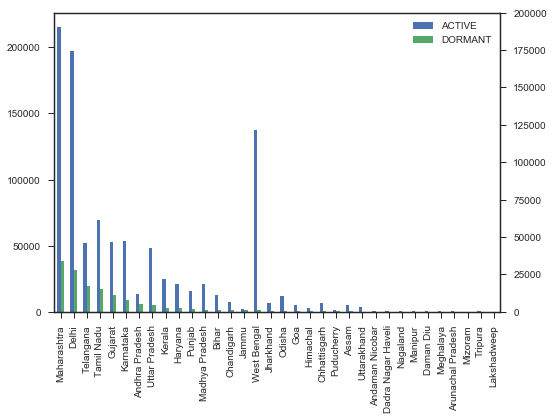

In [24]:
import pylab as pl


ax = df5.plot(kind="bar")
ax2 = ax.twinx()
for r in ax.patches[len(df5):]:
    r.set_transform(ax2.transData)
ax2.set_ylim(0, 200000);


(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 <a list of 8 Text xticklabel objects>)

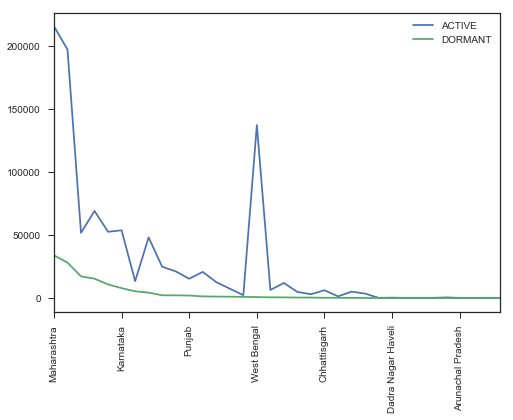

In [25]:
plt.figure(figsize=(10,15))
df5.plot()
plt.xticks(rotation=90)
# plt.xticks(df5.index,df5['ACTIVE'],rotation=90)

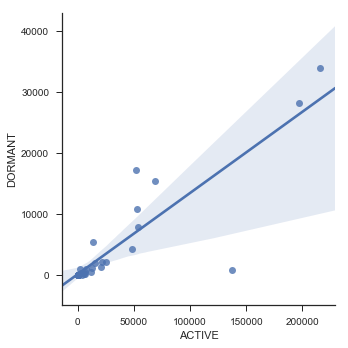

In [26]:
sns.lmplot('ACTIVE','DORMANT', data=df5, fit_reg=True)

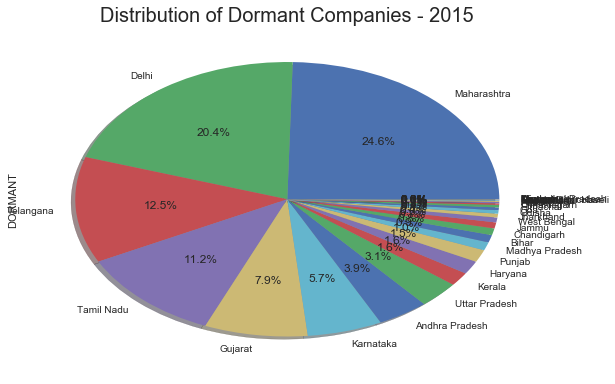

In [27]:
df5['DORMANT'].plot(kind='pie',autopct='%1.1f%%',shadow=True)
plt.title('Distribution of Dormant Companies - 2015',size=20)
plt.tight_layout()
plt.show()

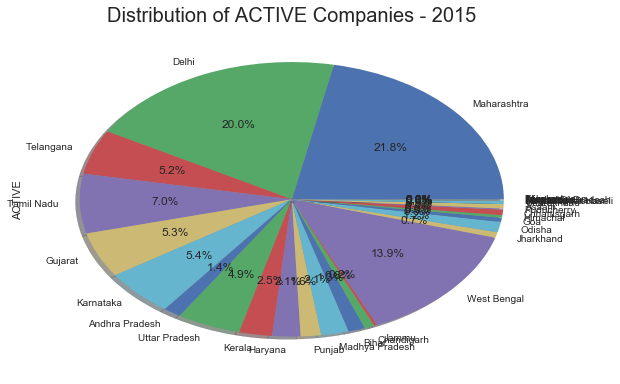

In [28]:
df5['ACTIVE'].plot(kind='pie',autopct='%1.1f%%',shadow=True)
plt.title('Distribution of ACTIVE Companies - 2015',size=20)
plt.tight_layout()
plt.show()

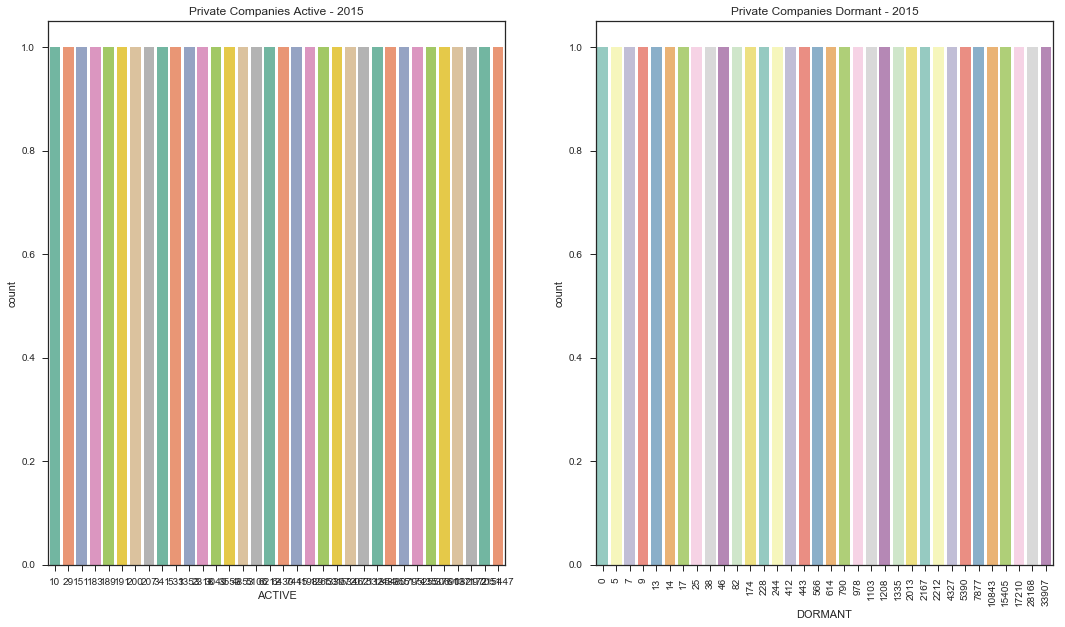

In [29]:
fig,ax=plt.subplots(1,2,figsize=(18,10))
sns.countplot(df5['ACTIVE'],ax=ax[0],palette='Set2').set_title('Private Companies Active - 2015')
plt.xticks(rotation=90)
plt.ylabel('No. of companies')

sns.countplot(df5['DORMANT'],ax=ax[1],palette='Set3').set_title('Private Companies Dormant - 2015')
plt.xticks(rotation=90)
plt.show()

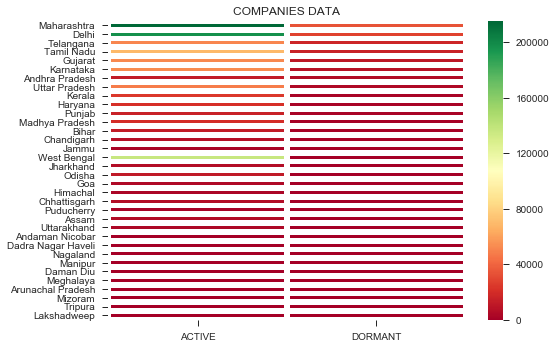

In [30]:
sns.heatmap(df5,annot=False,cmap='RdYlGn',linewidths=4.8)
plt.title('COMPANIES DATA')
plt.show()

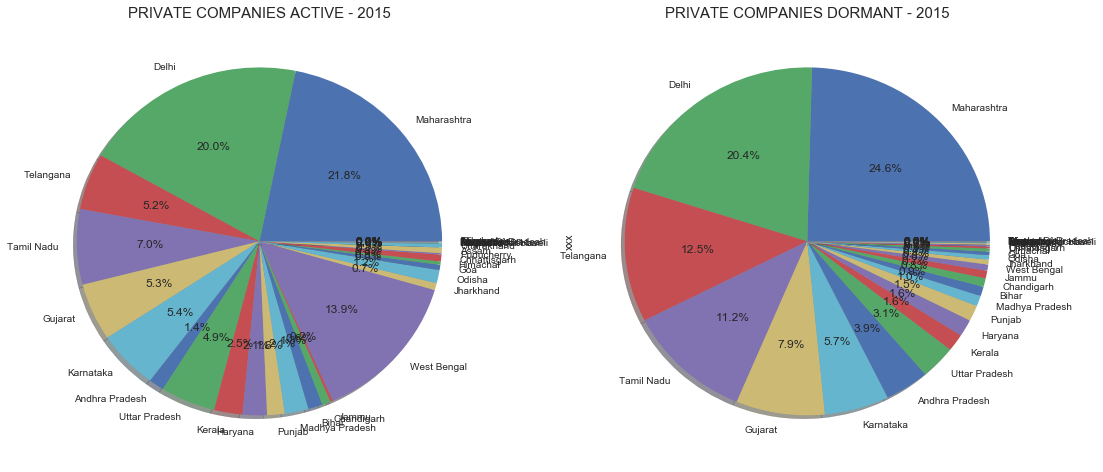

In [31]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df5['ACTIVE'].plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('PRIVATE COMPANIES ACTIVE - 2015',size=15)
ax[0].set_ylabel('')
fig = plt.gcf()
df5['DORMANT'].plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('PRIVATE COMPANIES DORMANT - 2015',size=15)
ax[1].set_ylabel('xxx')
plt.show()

In [ ]:
import pandas as pd
import bokeh.io
from bokeh.charts import Donut, HeatMap, Histogram, Line, Scatter, show, output_notebook, output_file
from bokeh.plotting import figure

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.


In [33]:
#visualizing the data using bokeh scatterplot
#output_file("rock_subgenres_yearwise.html", title="rock_subgenres_yearwise")
hm_rock_subgenres = Scatter(df5, x='DORMANT', y='ACTIVE', width=800, plot_height=800)
#x-axis properties
hm_rock_subgenres.xgrid.visible = False
#y-axis properties
hm_rock_subgenres.yaxis.major_label_orientation = 'horizontal'
hm_rock_subgenres.yaxis.axis_label = 'Subgenres of Rock'
hm_rock_subgenres.ygrid.visible = False
show(hm_rock_subgenres)


In [34]:
import numpy as np
df_jobtype = pd.pivot_table(df5,
                        values = ['ACTIVE', 'DORMANT'],
                        index = df5.index,
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_jobtype.style.background_gradient(cmap=cm)

In [35]:
import csv 

In [36]:
with open('/Users/nish/Downloads/Company Files/test/company_master_data_upto_Mar_2015_Andhra Pradesh.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=' ')
    print (readCSV)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nish/Downloads/Company Files/test/company_master_data_upto_Mar_2015_Andhra Pradesh.csv'

In [ ]:
with open(filename, '/Users/nish/Downloads/Company Files/test/company_master_data_upto_Mar_2015_Andhra Pradesh.csv') as csvfile:
    temp_lines = csvfile.readline() + '\n' + csvfile.readline()
    dialect = csv.Sniffer().sniff(temp_lines, delimiters=',|')



# OCCUPATION WISE CHARTS

In [ ]:
import glob
import pandas as pd

# get data file names
path =r'/Users/nish/Downloads/Company Files/test'
filenames = glob.glob(path + "/*.csv")

dic = {}
def retDataFrame(filename):   
    tDf1 = pd.read_csv(filename)
    tDf2 = tDf1.groupby('PRINCIPAL_BUSINESS_ACTIVITY').size()
    tDf3 = tDf2.to_frame(name=None).T
    tDf4 = tDf3.rename(index={0: b[0]})
    return tDf4;

for filename in filenames:
    a=filename.split('_')
    b=a[6].split('.')
    dic[b[0]] = retDataFrame(filename)

# Concatenate all data into one DataFrame
PBA_df = pd.concat(dic.values())
PBA_final=PBA_df.fillna(0)

In [ ]:
import seaborn as sns
PBA_corr=PBA_final.corr()
sns.heatmap(PBA_corr, 
            xticklabels=PBA_corr.columns.values,
            yticklabels=PBA_corr.columns.values)

In [ ]:
PBA_Agr = PBA_final['Agriculture and Allied Activities']
plch = PBA_final.columns.values


PBA_Agr.plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(10,8),use_index=False)
plt.title('Which STATE consists of highest amount of companies in Agriculture and Allied Activities in India',size=15)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
PBA_final.head()

In [ ]:
import matplotlib.pyplot as plt
PBA_Agr = PBA_final['Business Services']
plch = PBA_final.columns.values


PBA_Agr.plot(kind='pie',autopct='%1.0f%%',shadow=True,figsize=(10,8),use_index=False)
plt.title('Which STATE consists of highest amount of companies in Business Services',size=15)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.pointplot(x=PBA_Agr.index, y=PBA_Agr, hue=None, data=PBA_Agr, order=None, hue_order=None)

In [ ]:
PBA_final.plot(subplots=True,figsize=(10,5),kind='line')
plt.xticks(rotation=90)

In [ ]:
PBA_final.plot(legend='upper left')
plt.figure(figsize=(225,115))


# By Date of Registration

In [ ]:
import glob
import pandas as pd

# get data file names
path =r'/Users/nish/Downloads/Company Files/test'
filenames = glob.glob(path + "/*.csv")

dic = {}
def retDataFrame(filename):   
    tDf1 = pd.read_csv(filename,index_col='DATE_OF_REGISTRATION',parse_dates=True)
    tDf2 = tDf1.groupby('DATE_OF_REGISTRATION').size
    
    tDf3 = tDf2.to_frame(name=None).T
    tDf4 = tDf3.rename(index={0: b[0]})
    return tDf4;

for filename in filenames:
    a=filename.split('_')
    b=a[6].split('.')
    dic[b[0]] = retDataFrame(filename)

# Concatenate all data into one DataFrame
RegDate_df = pd.concat(dic.values())
RegDate_final=RegDate_df.fillna(0)

In [ ]:
RegDate=RegDate_final.T

In [ ]:
RegDate.sort_index()

In [ ]:
%matplotlib inline

In [ ]:
test = pd.read_csv('/Users/nish/Downloads/roughexcel.csv',index_col='DATE_OF_REGISTRATION',parse_dates=True)
test.sort_index()

In [ ]:
test

In [ ]:
df_tble

### Segmenting to see how machine learning classifies this data

In [ ]:
import csv 
 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
df_tble

In [ ]:
names=df_tble.columns.tolist

In [ ]:
X = np.array(df_tble)

In [ ]:
X

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimating the bandwidth of input data
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

In [ ]:
bandwidth

In [ ]:
# Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)

In [ ]:
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

print("\nNumber of clusters in input data =", num_clusters)

In [ ]:
names=['ACTIVE', 'ACTIVE IN PROGRESS', 'AMALGAMATED', 'CONVERTED TO LLP',
       'CONVERTED TO LLP AND DISSOLVED', 'DEFAULT', 'DISSOLVED', 'DORMANT',
       'Dormant under section 455 of Companies Act, 2013', 'LIQUIDATED',
       'STRIKE OFF', 'UNDER LIQUIDATION', 'UNDER PROCESS OF STRIKING OFF',
       'RATIO_ACTIVE_DORMANT']

In [ ]:
print("\nCenters of clusters:")
print('\t'.join([name[:] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))

In [ ]:
type(a)

In [ ]:
# Extract two features for visualization 
cluster_centers_2d = cluster_centers[:, 1:3]

In [ ]:
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], 
        s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
        cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp(),)
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
        cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Centers of 2D clusters')
plt.show()

In [ ]:
meanshift_model.labels_

In [ ]:
meanshift_model

In [ ]:
# Extract the centers of clusters 
cluster_centers = meanshift_model.cluster_centers_ 
print('\nCenters of clusters:\n', cluster_centers)

In [ ]:
# Estimate the number of clusters 
labels = meanshift_model.labels_ 
num_clusters = len(np.unique(labels)) 
print("\nNumber of clusters in input data =", num_clusters)


# Plot the points and cluster centers 
plt.figure() 
markers = 'o*xvs' 
for i, marker in zip(range(num_clusters), markers): 
    # Plot points that belong to the current cluster 
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='green') 
    # Plot the cluster center 
    cluster_center = cluster_centers[i] 
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
            markerfacecolor='black', markeredgecolor='black',  
            markersize=15) 
 
plt.title('Clusters') 
plt.show()

In [ ]:
meanshift_model.predict([[  5.50704000e+03   1.16000000e+00   3.22000000e+01   1.60000000e+00
    5.12000000e+00   4.00000000e-02   4.16000000e+00   6.85240000e+02
    1.64000000e+00   8.00000000e-01   1.70564000e+03   2.13600000e+01
    3.10240000e+02   0.00000000e+00]])

In [ ]:
S = meanshift_model.predict(X)

In [ ]:
for i,d in enumerate(S):
    if d == 0:
        b=(X[i])
        print(b)

In [ ]:
c=pd.DataFrame(b)

In [ ]:
c